In [47]:
import pandas as pd
a= pd.read_csv('/content/breast_cancer_survival (2).csv')
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [48]:
print(a.isnull().sum())

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64


In [67]:
x1=a.drop('Patient_Status',axis=1)
x2=x1.drop('Surgery_type',axis=1)
x3=x2.drop('Date_of_Surgery',axis=1)
x4=x3.drop('Date_of_Last_Visit',axis=1)
x5=x4.drop('Histology',axis=1)
x6=x5.drop('HER2 status',axis=1)
x7=x6.drop('PR status',axis=1)
x8=x7.drop('ER status',axis=1)
x=x8.drop('Gender',axis=1)
print("FEATURES:")
print(x)


FEATURES:
     Age  Protein1  Protein2  Protein3  Protein4 Tumour_Stage
0     42  0.952560   2.15000  0.007972 -0.048340           II
1     54  0.000000   1.38020 -0.498030 -0.507320           II
2     63 -0.523030   1.76400 -0.370190  0.010815           II
3     78 -0.876180   0.12943 -0.370380  0.132190            I
4     42  0.226110   1.74910 -0.543970 -0.390210           II
..   ...       ...       ...       ...       ...          ...
329   59  0.024598   1.40050  0.024751  0.280320           II
330   41  0.100120  -0.46547  0.472370 -0.523870            I
331   54  0.753820   1.64250 -0.332850  0.857860           II
332   74  0.972510   1.42680 -0.366570 -0.107820           II
333   66  0.286380   1.39980  0.318830  0.836050           II

[334 rows x 6 columns]


In [50]:
x['Tumour_Stage'] = x['Tumour_Stage'].replace("I",1)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
x['Tumour_Stage'] = x['Tumour_Stage'].replace("II",2)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
x['Tumour_Stage'] = x['Tumour_Stage'].replace("III",3)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
print("FEATURES:\n\n")
print(x)

FEATURES:


     Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
0     42  0.952560   2.15000  0.007972 -0.048340             2
1     54  0.000000   1.38020 -0.498030 -0.507320             2
2     63 -0.523030   1.76400 -0.370190  0.010815             2
3     78 -0.876180   0.12943 -0.370380  0.132190             1
4     42  0.226110   1.74910 -0.543970 -0.390210             2
..   ...       ...       ...       ...       ...           ...
329   59  0.024598   1.40050  0.024751  0.280320             2
330   41  0.100120  -0.46547  0.472370 -0.523870             1
331   54  0.753820   1.64250 -0.332850  0.857860             2
332   74  0.972510   1.42680 -0.366570 -0.107820             2
333   66  0.286380   1.39980  0.318830  0.836050             2

[334 rows x 6 columns]


In [51]:
y0=a['Patient_Status']
print(y0)
print("\nVALUES IN y0:")
print(set(y0))

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object

VALUES IN y0:
{nan, 'Alive', 'Dead'}


In [68]:
y = y0.replace({"Alive": 1, "Dead": 0})
y = y.fillna(0)
y.to_csv("updated_breast_cancer_survival.csv", index=False)
print("TARGET VARIABLE:")
print(y)
print(set(y))

TARGET VARIABLE:
0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64
{0.0, 1.0}


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.5714285714285714, 0.7023809523809523, 0.6309523809523809, 0.6904761904761905, 0.6547619047619048, 0.6785714285714286, 0.6904761904761905, 0.6904761904761905, 0.6904761904761905, 0.7023809523809523, 0.7023809523809523, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7261904761904762, 0.7142857142857143, 0.7261904761904762, 0.7261904761904762]


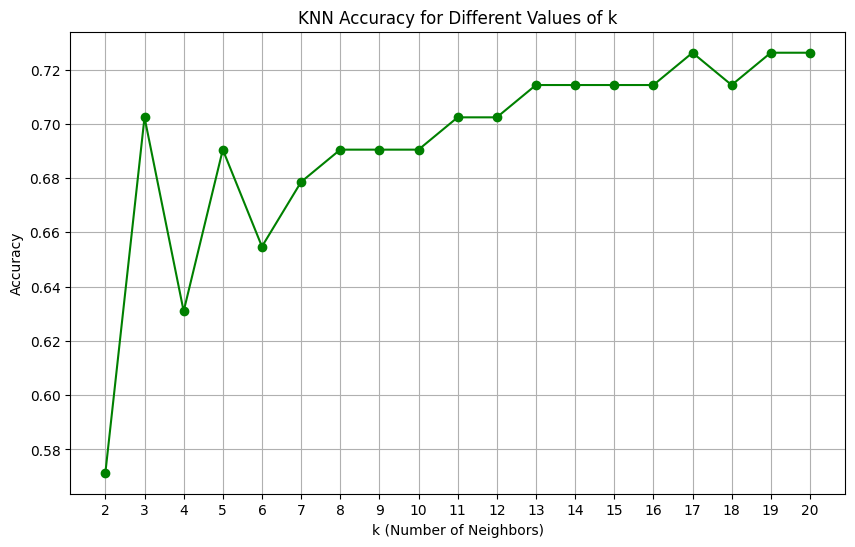

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='g')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [69]:
import pandas as pd
b= pd.read_csv('/content/Japan_life_expectancy (1).csv')
print(b)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
columns_to_drop = ['Park', 'University', 'Junior_col', 'Prefecture']
x_j = b.drop(columns=columns_to_drop)
y_j = b['Welfare_exp']
print("FEATURES:")
print(x_j)

FEATURES:
    Life_expectancy  Physician  Public_Hosp  Pshic_hosp  Beds_psic  Nurses  \
0             84.65      224.4         13.7         0.5      164.3   845.4   
1             83.79      242.6         34.0         1.7      404.6  1105.5   
2             82.80      212.5         42.9         1.4      348.7  1108.8   
3             84.48      205.8         16.1         0.5      195.8   749.1   
4             84.24      276.7         17.4         1.0      329.7  1277.5   
5             84.91      257.9         22.8         1.3      284.1  1124.5   
6             84.54      309.9          8.9         1.2      407.0  1333.7   
7             83.71      205.7         20.6         1.3      339.8   994.7   
8             84.71      224.5         24.7         0.6      195.2   942.7   
9             84.16      233.8         16.5         0.7      257.5  1054.1   
10            85.06      267.1         14.1         1.1      309.7  1198.5   
11            84.00      251.3         21.1         1.

In [76]:
print("TARGET VARIABLE:")
print(y_j)

TARGET VARIABLE:
0     16.53
1     13.50
2     15.92
3     18.24
4     15.60
5     12.38
6     21.51
7     18.81
8     15.29
9     17.28
10    17.98
11    16.18
12    17.80
13    17.50
14    13.93
15    10.31
16    15.26
17    17.85
18    23.01
19    14.74
20    17.18
21    19.24
22    17.18
23    13.48
24    15.88
25    15.48
26    15.58
27    17.52
28    12.72
29    15.15
30    16.41
31    17.73
32    21.42
33    15.24
34    20.49
35    15.43
36    11.87
37    16.83
38    16.23
39    13.38
40    14.47
41    13.63
42    13.28
43    14.37
44    13.18
45    15.21
46    12.34
Name: Welfare_exp, dtype: float64


In [77]:
Xj_train, Xj_test, yj_train, yj_test = train_test_split(x_j, y_j, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(Xj_train, yj_train)
yj_pred = knn_regressor.predict(Xj_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.7192291250000014


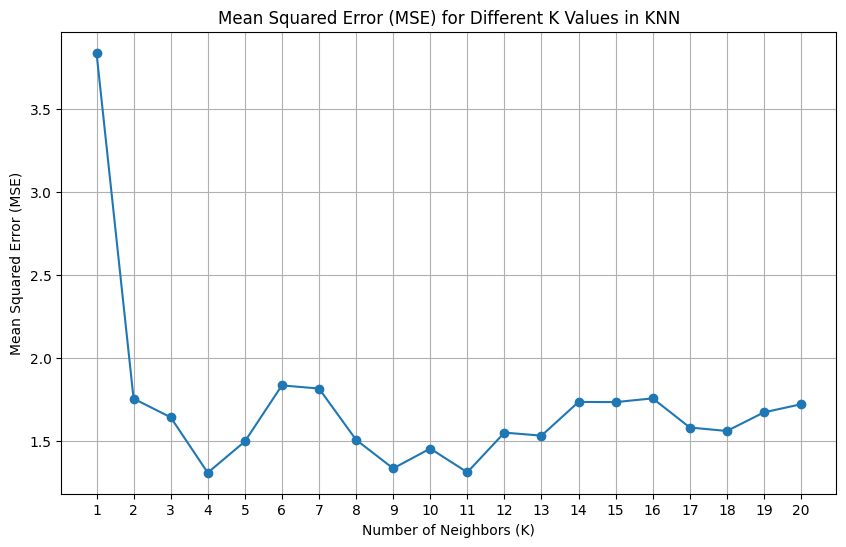

In [78]:
import matplotlib.pyplot as plt
k_values = list(range(1, 21))
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(Xj_train, yj_train)

    yj_pred = knn_regressor.predict(Xj_test)

    mse = mean_squared_error(yj_test, yj_pred)
    mse_values.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error (MSE) for Different K Values in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()